# Lecture 5: Community detection

In this lecture we will learn about some tools for community detection, both in NetworkX and other options. For a great overview on community detection check out [this presentation](https://www.euro-online.org/websites/ewgla/wp-content/uploads/sites/14/2018/11/EWGLA-2015-SantoFortunato.pdf) by Prof. Santo Fortunato.

## Introduction

### Definition of community detection in networks
- Community detection in networks refers to the task of identifying groups of nodes (called communities) that are more densely connected to each other than to the rest of the network.
- These communities can often correspond to meaningful structures or patterns in the data, and can help us understand the organization and function of the network.
    
### Importance of community detection in various fields
- Community detection is a widely used technique in various fields, including social network analysis, biological network analysis, text network analysis, and many others.
- In social networks, communities can correspond to groups of friends, co-workers, or other social groups. In biological networks, communities can represent functional modules of proteins or pathways in a cellular network. In text networks, communities can represent topics or themes in a corpus of documents.
    
### Overview of different methods for community detection
- There are many different methods for detecting communities in networks, ranging from simple heuristics to more complex algorithms.
- Some popular methods include modularity optimization, spectral clustering, random walk-based methods, statistical methods, and many others.
- Each method has its own strengths and limitations, and the appropriate method depends on the characteristics of the network and the research goals.

## Community detection methods

### Overview of different methods for community detection (e.g. modularity optimization, spectral clustering, random walk-based methods, statistical methods,...)

#### Modularity optimization
Modularity is a measure of the density of edges within communities compared to the density of edges between communities.
The modularity optimization method seeks to identify a partition of the nodes into communities that maximizes the modularity of the network.
This method is relatively fast and easy to implement, but it may not always find the globally optimal solution.

#### Spectral clustering
Spectral clustering is a method that uses the eigenvectors of the adjacency matrix or graph Laplacian of the network to perform dimensionality reduction, and then applies clustering algorithms (such as k-means or agglomerative clustering) to the reduced data to identify communities.
This method is based on the idea that the eigenvectors of the graph Laplacian capture important structural information about the network, and can be used to reveal the underlying community structure.
Spectral clustering is generally more computationally expensive than modularity optimization, but it can be more effective for detecting fine-grained or overlapping communities.

#### Random walk-based methods
Random walk-based methods use random walks on the network to define a probability distribution over the nodes, and then use this distribution to identify communities based on the relative probabilities of nodes within the same community compared to nodes in different communities.
One example of a random walk-based method is the Infomap algorithm, which uses a random walk to define a flow of information over the network, and then identifies communities as the parts of the network with high intra-community flow and low inter-community flow.
Random walk-based methods are generally more computationally expensive than modularity optimization and spectral clustering, but they can be effective for detecting hierarchical or overlapping communities.

#### Statistical models

##### Stochastic block models
Stochastic block models are probabilistic generative models for networks in which the nodes are partitioned into a fixed number of communities, and the probability of an edge between two nodes depends on the community membership of the nodes.
The goal of community detection using stochastic block models is to estimate the underlying community structure and the parameters of the model (e.g. the number of communities, the community membership of the nodes, the edge probabilities within and between communities) from the observed network.
There are various methods for fitting stochastic block models to networks, including maximum likelihood estimation, variational inference, and Markov chain Monte Carlo sampling.

##### Latent space models
Latent space models are probabilistic generative models that represent the nodes of a network as points in a latent space, and the edges as probabilities based on the distance between the points in the latent space.
The latent space is usually assumed to be low-dimensional, and the goal is to learn the latent positions of the nodes and the dimensionality of the latent space from the observed network.
Latent space models can be viewed as a generalization of stochastic block models, as they allow for more flexible modeling of the community structure and the edge probabilities.

##### Mixed membership models
Mixed membership models are probabilistic generative models that allow each node to belong to multiple communities simultaneously, with different probabilities.
The goal is to estimate the community membership probabilities for each node and the parameters of the model (e.g. the number of communities, the community membership probabilities) from the observed network.
Mixed membership models can capture overlapping and hierarchical community structure, and can be fit using maximum likelihood estimation or variational inference.

### Implementing these methods in Python using libraries such as NetworkX, scikit-learn, and Infomap
- There are various Python libraries that can be used to implement community detection methods, including NetworkX, scikit-learn, and Infomap.
- For example, NetworkX provides functions for modularity optimization and spectral clustering, and Infomap is a standalone library for random walk-based community detection.
- In addition to these libraries, it is also possible to implement some methods from scratch using basic Python libraries such as NumPy and SciPy.
- You can check the methods implemented in python by accessing [this webpage](https://networkx.org/documentation/stable/reference/algorithms/community.html).

We will now try a couple of the algorithms included in networkx for community detection.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
G = nx.karate_club_graph()
pos = nx.fruchterman_reingold_layout(G)

In [2]:
def draw_karate_network_with_communities(G,pos,communities):
    '''
    Draws the zakary karate club network with different symbols for the two clubs and different colors for the different communities.
    '''
    N_com = len(communities)
    colors = get_N_HexCol(N_com)
    print(colors)
    i = 0
    for comm in communities:
        comm = list(comm)
        # draw nodes belonging to 'Mr. Hi'
        nodes_Hi = [node for node in comm if G.nodes[node]['club']=='Mr. Hi']
        nx.draw_networkx_nodes(G,pos,nodes_Hi,node_color=colors[i],node_shape='s')
        # draw nodes belonging to 'Officer'
        nodes_Of = [node for node in comm if G.nodes[node]['club']=='Officer']
        nx.draw_networkx_nodes(G,pos,nodes_Of,node_color=colors[i],node_shape='*')
        i += 1
    nx.draw_networkx_edges(G,pos,G.edges)
    plt.axis('off')
    return

import colorsys
def get_N_HexCol(N=5):
    HSV_tuples = [(x * 1.0 / N, 0.5, 0.5) for x in range(N)]
    hex_out = []
    for rgb in HSV_tuples:
        rgb = map(lambda x: int(x * 255), colorsys.hsv_to_rgb(*rgb))
        hex_out.append('#%02x%02x%02x' % tuple(rgb))
    return hex_out

[frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 16, 19, 4, 5, 6, 10, 11})]
['#7f3f3f', '#3f7f3f', '#3f3f7f']


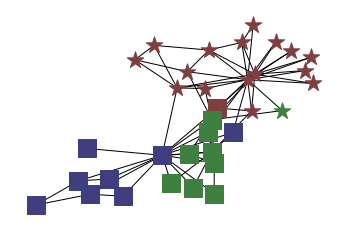

In [3]:
# Modularity optimization

communities_modularity = nx.algorithms.community.greedy_modularity_communities(G, weight='weight')
print(communities_modularity)
draw_karate_network_with_communities(G,pos,communities_modularity)

3
['#7f3f3f', '#3f7f3f', '#3f3f7f']


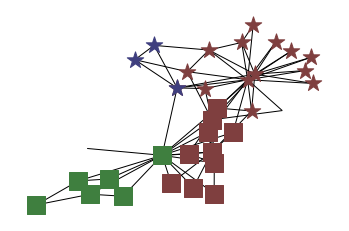

In [16]:
# Louvain -> stochasticity

communities_clique = nx.algorithms.community.k_clique_communities(G,3)
communities_clique = list(communities_clique)
print(len(list(communities_clique)))
draw_karate_network_with_communities(G,pos,list(communities_clique))

2
['#7f3f3f', '#3f7f7f']


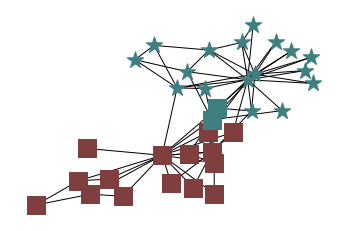

In [7]:
# Girvan Newman -> different levels

communities_gn = nx.algorithms.community.girvan_newman(G)
communities_gn = list(communities_gn)
print(len(communities_gn[0]))
draw_karate_network_with_communities(G,pos,communities_gn[0])

Now let's try infomap. There is a specific package in python that implements infomap. You should install it by typing in a terminal (with the `complex_networks` environment activated):
```bash
pip install infomap
```
Let's take a look at what [Infomap does](https://www.mapequation.org/infomap/#Input). You can see the usage of this package[here](https://mapequation.github.io/infomap/python/) and [here](https://mapequation.github.io/infomap/python/infomap.html).

In [6]:
from infomap import Infomap
im = Infomap()
mapping = im.add_networkx_graph(G)
im.run()

  Infomap v1.4.4 starts at 2023-01-16 18:23:58
  -> Input network: 
  -> No file output!
  OpenMP 201511 detected with 8 threads...
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 34 nodes and 78 links...
Calculating one-level codelength... done!
 -> One-level codelength: 4.7044226
Calculating entropy rate... done!
  -> Entropy rate: 1.238070292

Trial 1/1 starting at 2023-01-16 18:23:58
Two-level compression: 7.6% 0.86% 
Partitioned to codelength 0.256946718 + 4.05484593 + 0 = 4.311792646 in 3 modules.
Super-level compression: to codelength 4.311792646 in 3 top modules.

Recursive sub-structure compression: 0% . Found 2 levels with codelength 4.311792646

=> Trial 1/1 finished in 0.004788s with codelength 4.31179265


Summary after 1 trial
Best end modular solution in 2 levels:
Per level num

In [2]:
for node in im.nodes:

SyntaxError: invalid syntax (1904403434.py, line 1)

### Evaluation of community detection results using metrics such as modularity, normalized mutual information, and adjusted Rand index
- It is important to evaluate the quality of the detected communities in order to assess the performance of the community detection method.
- Some common metrics for evaluating community detection results include modularity, normalized mutual information, and adjusted Rand index.
- These metrics can be computed using libraries such as sklearn and NetworkX, or can be implemented manually using basic Python functions.

## Applications of community detection:

### Case studies demonstrating the use of community detection in real-world scenarios such as social network analysis, biological network analysis, and text network analysis
- Examples of the use of community detection in different fields such as social network analysis, biological network analysis, and text network analysis.
- These case studies can illustrate the benefits of using community detection in understanding the structure and function of the network, and can provide insight into the appropriate choice of methods and evaluation metrics for different types of data.
### Hands-on exercises applying community detection methods to different types of networks
- Practical exercises in which students apply community detection methods to different types of networks, such as social networks, biological networks, and text networks.
- These exercises can help students gain experience in using Python libraries and implementing community detection methods, as well as evaluating the results using different metrics.


## Advanced topics:

### Extension of community detection methods to overlapping and dynamic communities
- Many networks have communities that overlap, meaning that a node can belong to multiple communities simultaneously.
- There are methods that can handle overlapping communities, such as the Louvain method and the clique percolation method.
- Dynamic networks, on the other hand, change over time, and there are methods that can track the evolution of communities over time, such as the temporal modularity optimization method.
### Incorporating additional network features (e.g. node attributes, temporal information) in community detection
- In some cases, the network may have additional features such as node attributes (e.g. age, gender, location) or temporal information (e.g. when the edges were formed).
- These features can be incorporated into the community detection process in order to obtain more nuanced and meaningful communities.
- For example, node attributes can be used as constraints or weights in the community detection process, and temporal information can be used to track the evolution of communities over time.
### Scalability of community detection methods for large-scale networks
- For very large networks, it may be computationally infeasible to apply community detection methods directly.
- There are various techniques that can be used to scale up community detection methods to handle large-scale networks, such as sampling, parallelization, and approximate methods.
- It is important to consider the scalability of the chosen method in order to ensure that the results can be obtained in a reasonable amount of time.

## Exercise: Community detection in a social network

In this exercise, you will apply community detection methods to a real-world social network dataset and evaluate the results.

1. Obtain the dataset:
    - The dataset consists of a social network of friendships between Facebook users.
    - The network is represented as an undirected, unweighted graph in which each node represents a user and each edge represents a friendship.
    - The dataset can be obtained from the SNAP (Stanford Network Analysis Project) website (https://snap.stanford.edu/data/ego-Facebook.html).

2. Load the dataset into Python:
    - Use a library such as NetworkX to read the dataset file and create a network object in Python.
    - Explore the network by printing the number of nodes and edges, and by visualizing a small subgraph.

3. Apply community detection methods:
    - Choose at least two different community detection methods from the following list: modularity optimization, spectral clustering, and the Louvain method.
    - Use the chosen methods to detect communities in the network.
    - Visualize the detected communities by coloring the nodes in the network according to their community membership.

4. Evaluate the results:
    - Use metrics such as modularity, normalized mutual information, and adjusted Rand index to evaluate the quality of the detected communities.
    - Compare the results of the different methods and discuss the strengths and limitations of each method.